Import Library

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

Load Data

In [3]:
# Load dataset
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,NaN,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,NaN,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,NaN,47.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [5]:
# Cek berapa missing values sebelum imputasi
print("Missing values sebelum imputasi:")
print(data.isnull().sum())

Missing values sebelum imputasi:
Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64


1. Imputasi missing value dengan mean, median, dan modus

In [39]:
# Membuat salinan data untuk imputasi
df_impute_mean = data.copy()

# Lakukan imputasi pada data yang memiliki missing values
mean_imputer = SimpleImputer(strategy='mean')
df_impute_mean = pd.DataFrame(mean_imputer.fit_transform(df_impute_mean), columns=df_impute_mean.columns)

# Pastikan semua nilai NaN sudah terimputasi
print(df_impute_mean.isna().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [33]:
df_impute_mean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,120.462481,72.0,35.0,0.0,31.99368,0.627000,33.166124,1.0
1,1.0,85.000000,66.0,29.0,0.0,31.99368,0.351000,31.000000,0.0
2,8.0,183.000000,64.0,0.0,0.0,23.30000,0.672000,32.000000,1.0
3,1.0,89.000000,66.0,23.0,94.0,28.10000,0.167000,21.000000,0.0
4,0.0,120.462481,40.0,35.0,168.0,43.10000,0.465363,33.000000,1.0


In [7]:
#Imputasi Missing Value dengan median

# Membuat salinan data untuk imputasi
df_impute_median = data.copy()

median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df_impute_median = pd.DataFrame(median_imputer.fit_transform(df_impute_median), columns=df_impute_median.columns)
df_impute_median.isna().sum() # Memeriksa apakah masih ada missing values setelah imputasi

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
df_impute_median.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,116.0,72.0,35.0,0.0,32.15,0.627,29.0,1.0
1,1.0,85.0,66.0,29.0,0.0,32.15,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.30,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.10,0.167,21.0,0.0
4,0.0,116.0,40.0,35.0,168.0,43.10,0.365,33.0,1.0


In [10]:
#Imputasi Missing Value dengan modus

# Membuat salinan data untuk imputasi
df_impute_modus = data.copy()

modus_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_impute_modus = pd.DataFrame(modus_imputer.fit_transform(df_impute_modus), columns=df_impute_modus.columns)
df_impute_modus.isna().sum() # Memeriksa apakah masih ada missing values setelah imputasi

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [35]:
df_impute_modus.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,100.0,72.0,35.0,0.0,31.2,0.627,22.0,1.0
1,1.0,85.0,66.0,29.0,0.0,31.2,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,100.0,40.0,35.0,168.0,43.1,0.207,33.0,1.0


2. Cek korelasi antar variabel dengan heatmap

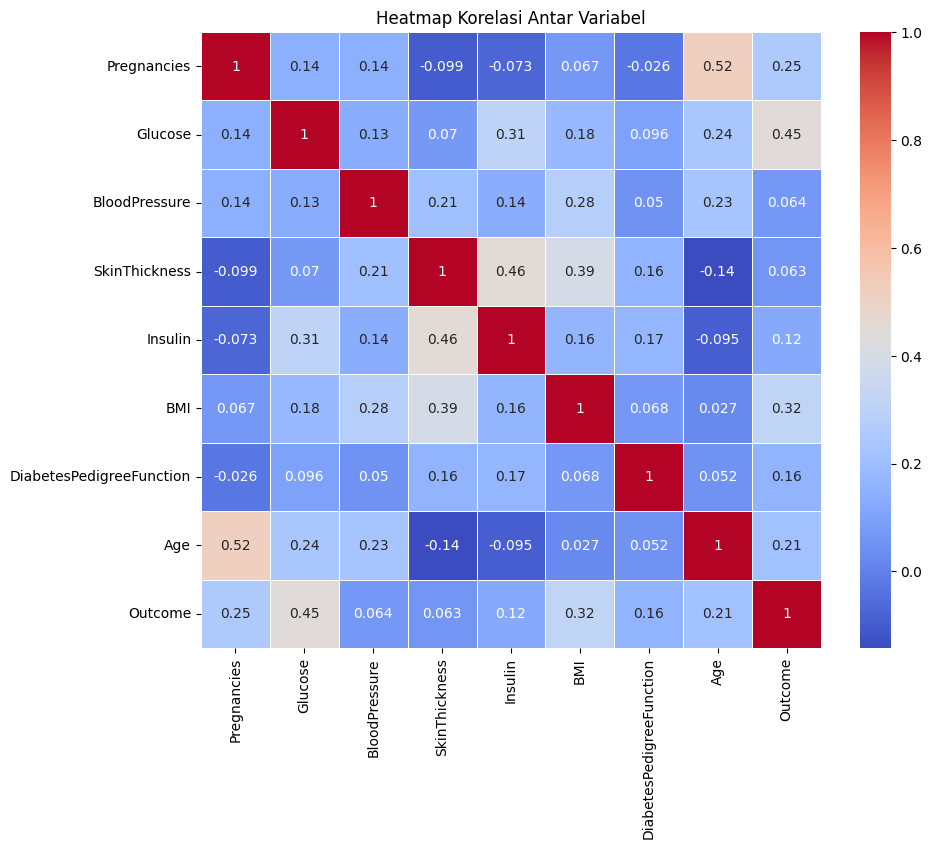

In [11]:
plt.figure(figsize=(10,8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

3. Lakukan imbalance handling dengan undersampling

In [12]:
#Handling imbalance data dengan undersampling
X = data.drop('Outcome', axis=1)  
y = data['Outcome']  

# Menggunakan RandomUnderSampler untuk mengatasi imbalance
undersample = RandomUnderSampler(sampling_strategy='auto')
X_res, y_res = undersample.fit_resample(X, y)

# Melihat distribusi data setelah undersampling
print("Distribusi data setelah undersampling:")
print(y_res.value_counts())

Distribusi data setelah undersampling:
Outcome
0    268
1    268
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Outcome'>

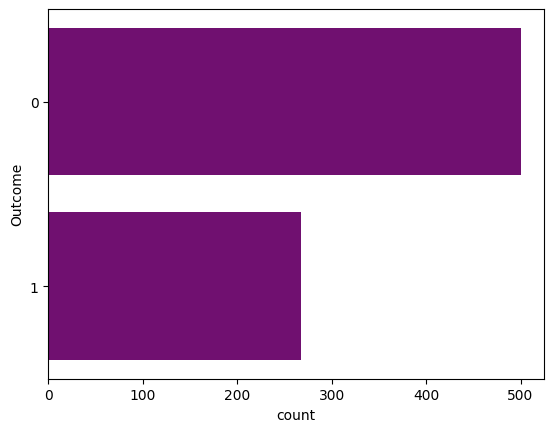

In [59]:
sns.countplot(data=data, y=y, color='Purple')

<Axes: xlabel='count', ylabel='Outcome'>

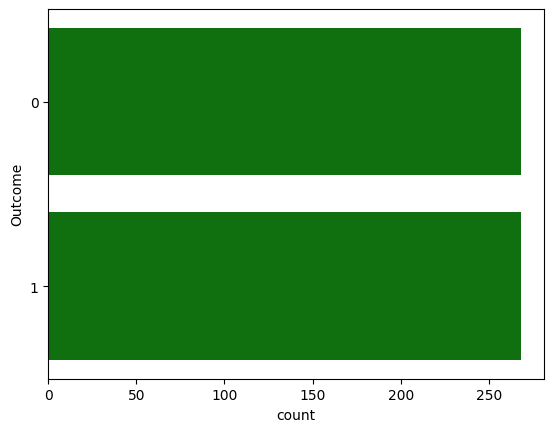

In [33]:
sns.countplot(data=X_res, y=y_res, color='green')

4. Lakukan scaling dengan robust scaler dan minmax

In [57]:
#Scaling dengan robust scaler

df_mean = df_impute_mean.copy()

robust_scaler = RobustScaler()
df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(df_mean), columns=df_mean.columns)

print("Data setelah Scaling dengan Robust Scaling:\n", df_robust_scaled.head())

Data setelah Scaling dengan Robust Scaling:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.549204  0.000000       0.233901        0.40625 -0.831119  0.000000   
1    -0.700796 -1.099612      -0.227637        0.21875 -0.831119  0.000000   
2     1.049204  1.939148      -0.381483       -0.68750 -0.831119 -1.879715   
3    -0.700796 -0.975581      -0.227637        0.03125  0.185098 -0.841877   
4    -0.950796  0.000000      -2.227637        0.40625  0.985098  2.401366   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.641312  0.000000      1.0  
1                 -0.181954 -0.180510      0.0  
2                  0.775541 -0.097177      1.0  
3                 -0.730798 -1.013844      0.0  
4                  0.159174 -0.013844      1.0  


In [58]:
#Scaling dengan minmax

df_scale = df_impute_mean.copy()

minmax_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df_scale), columns=df_scale.columns)

print("Data setelah Scaling dengan MinMaxScaler:\n", df_minmax_scaled.head())

Data setelah Scaling dengan MinMaxScaler:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.605339       0.631579       0.353535  0.000000  0.476806   
1     0.058824  0.427136       0.578947       0.292929  0.000000  0.476806   
2     0.470588  0.919598       0.561404       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.578947       0.232323  0.138235  0.418778   
4     0.000000  0.605339       0.350877       0.353535  0.247059  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.243892  0.202769      1.0  
1                  0.121279  0.166667      0.0  
2                  0.263883  0.183333      1.0  
3                  0.039538  0.000000      0.0  
4                  0.172085  0.200000      1.0  


visualisasi

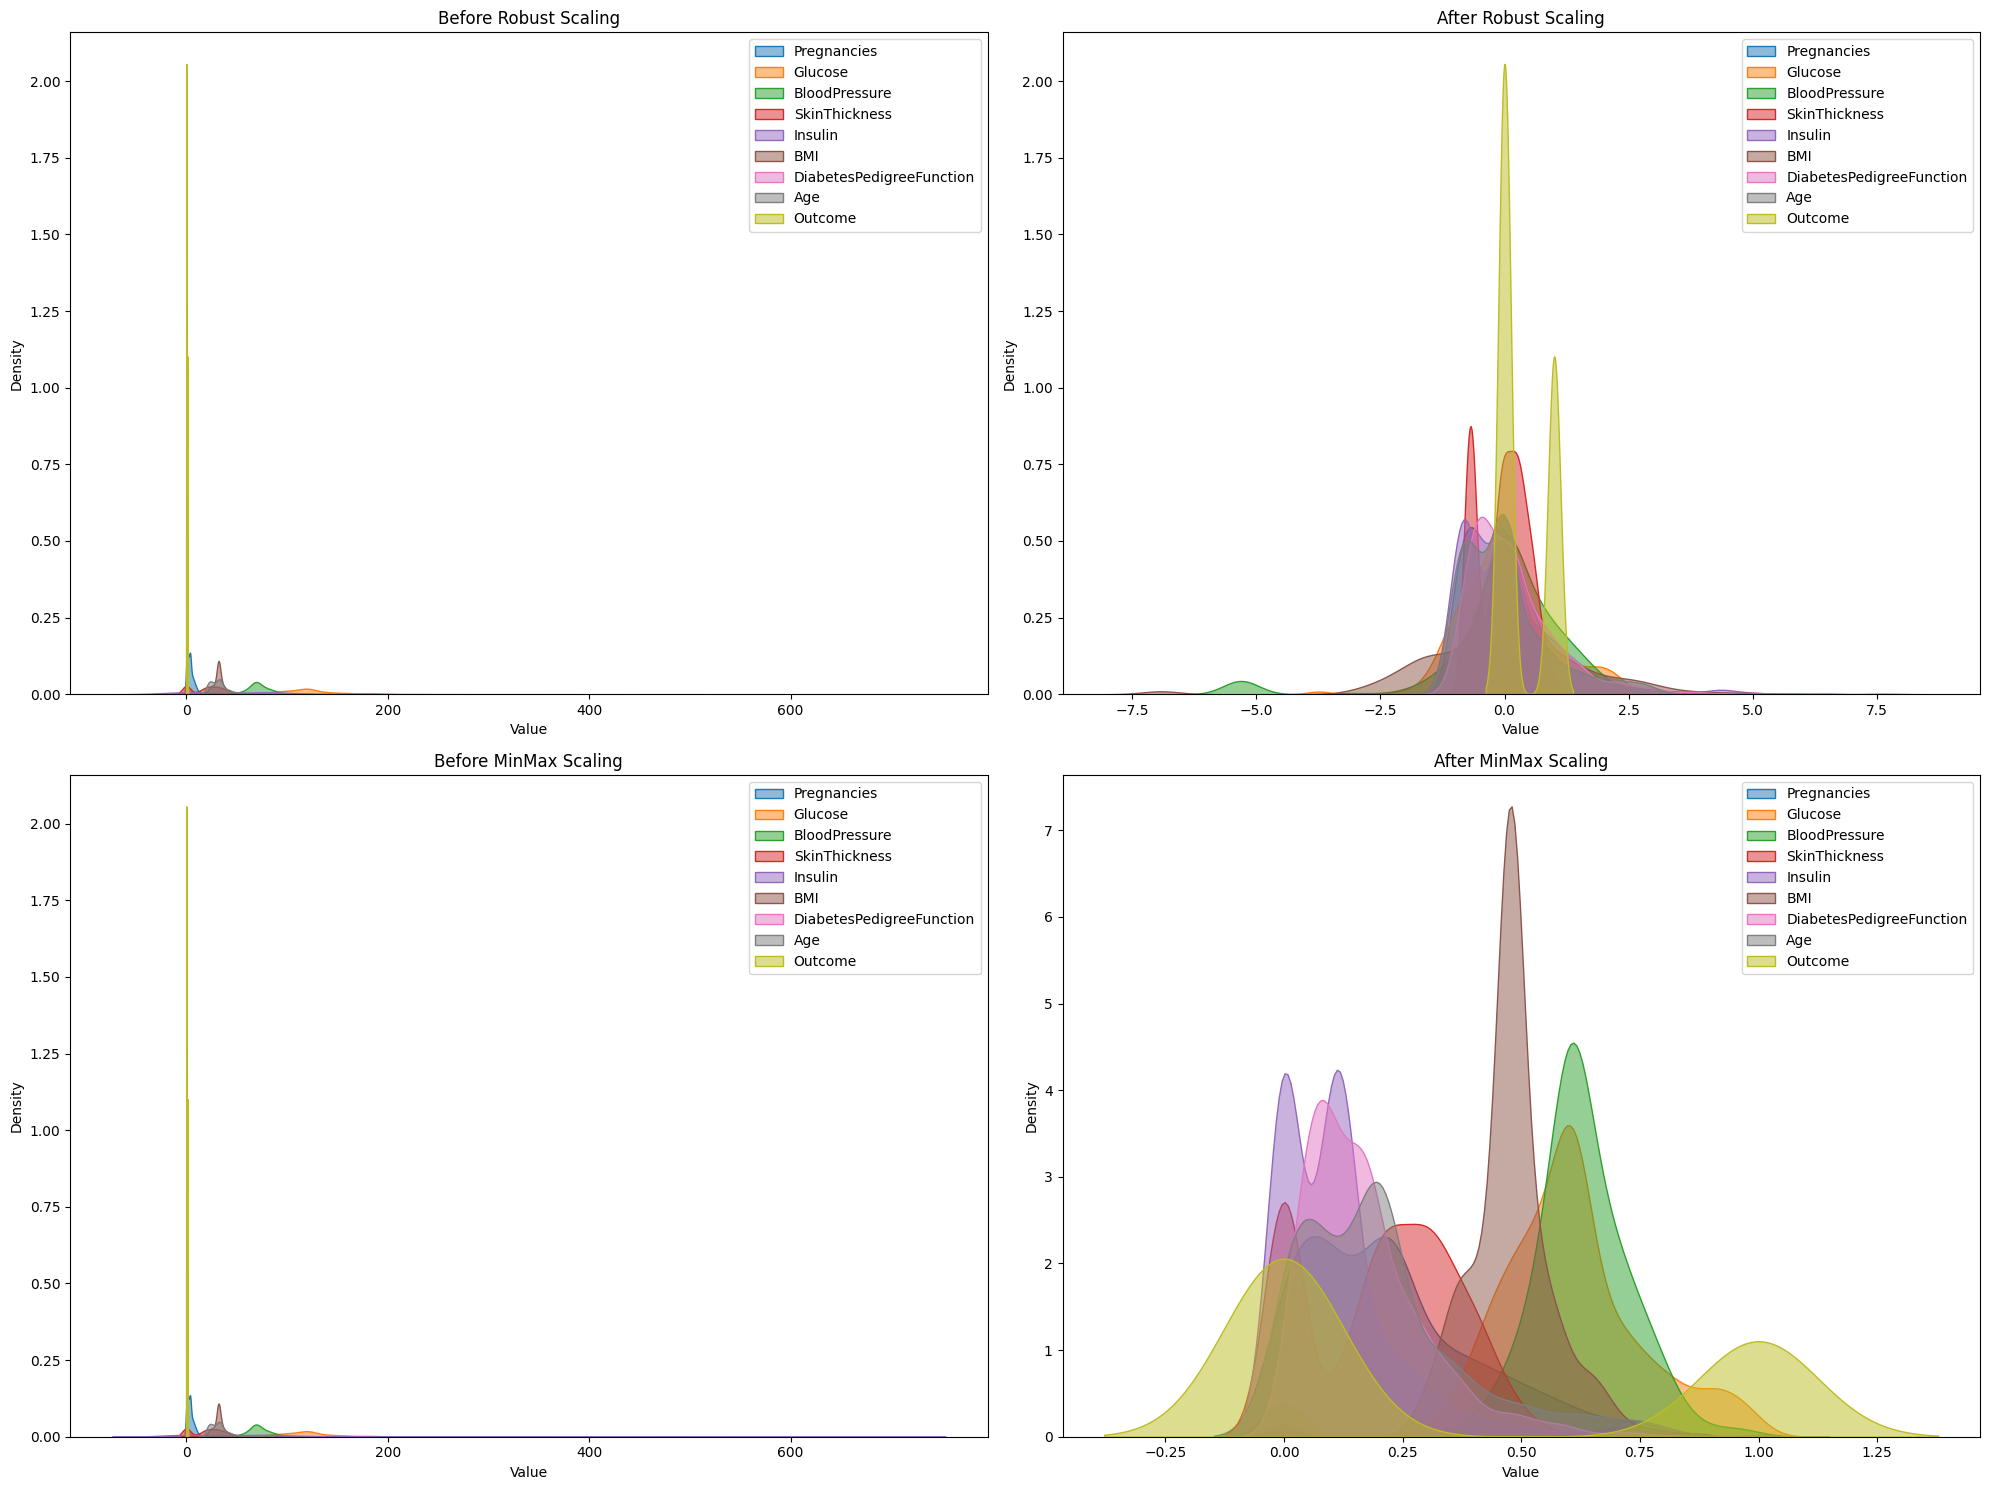

In [49]:
plt.figure(figsize=(20, 15))

# Kolom yang akan divisualisasikan
columns_to_plot = [  
    'Pregnancies', 'Glucose', 'BloodPressure',   
    'SkinThickness', 'Insulin', 'BMI',   
    'DiabetesPedigreeFunction', 'Age', 'Outcome'  
]  

#Sebelum Scaling Robust
plt.subplot(2, 2, 1)
for col in columns_to_plot:  
    sns.kdeplot(data=df_scale[col], label=col, fill=True, alpha=0.5)
plt.title('Before Robust Scaling')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Setelah Scaling Robust
plt.subplot(2, 2, 2)
for col in columns_to_plot:  
    sns.kdeplot(data=df_robust_scaled[col], label=col, fill=True, alpha=0.5)
plt.title('After Robust Scaling')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

#Sebelum Scaling MinMax
plt.subplot(2, 2, 3)
for col in columns_to_plot:  
    sns.kdeplot(data=df_scale[col], label=col, fill=True, alpha=0.5)
plt.title('Before MinMax Scaling')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

#Setelah Scaling MinMax
plt.subplot(2, 2, 4)
for col in columns_to_plot:  
    sns.kdeplot(data=df_minmax_scaled[col], label=col, fill=True, alpha=0.5)
plt.title('After MinMax Scaling')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()